# Dynamical systems as Linear Transformations

***Credit**: [Ben Vanderlei's Jupyter Guide to Linear Algebra](https://bvanderlei.github.io/jupyter-guide-to-linear-algebra/) under CC BY 4.0 with minor adaptations.*

### Discrete dynamical systems

In week 1 we learnt the basics of algebra, now we are going to see how these concepts we learn such vector, matrix or eigenvalues can be useful to study dynamical systems. Giving us a complentary view to that of differential equations.

It is often useful to describe a structure that has multiple components with a single vector.  If that structure is changing in time due to some process, it is typical to refer to the vector as a **state vector** since it describes the *state* of the structure at some particular time. To be less abstract, an example would be if you want to quantify the concentration of different neurotransmitters in a synaptic cleft: you could represent the concentration of each of them as a value in a vector. Equivalently, if you are studying the movement of an animal, you could represent the position of each of animal joint as value in the vector so you can track its movement during an experiment.

It is quite common to model such dynamic processes at discrete times and use linear transformations to model the evolution of the state vector from one time to the next.

Let's suppose that we aim to describe sequence of vectors at times $t=0, 1, 2, 3,$... with state vectors $X_0$, $X_1$, $X_2$, $X_3$.... at those times.  We propose to calculate the state vector $X_t$ based only on the previous state vector $X_{t-1}$.  If we model the transition from $X_{t-1}$ to $X_t$ with a linear transformation, then there is a matrix such that $X_t = AX_{t-1}$.  This sort of model is known as a **discrete dynamical system** and is used in many areas from economics to biology.
Although the underlying phenomena —eg. the movement of the animal articulations or chemical concentrations— may change continuously, any experimental measures will always be discrete and hence we need discrete models.

#### Infectious Disease Model

In this example we consider a basic model of an infectious disease that is spreading within a population.  A well known family of models for this scenario is known as the $SIR$ models.  The acronym comes from a basic modeling assumption that the population is divided into three categories: Susceptible, Infectious, and Recovered.  As the disease, spreads a portion of the Susceptible individuals become Infectious, and a portion of Infectious individuals become Recovered.  We will consider a small variation in the model which assumes that a portion of Recovered individuals return to the Susceptible category.  This variation, known as an $SIRS$ model, would be a more accurate description of a disease which can be contracted multiple times.

We suppose that the population is completely homogeneous in all regards, so that all individuals in a given category have the same probabilities to move to the next category.

To model real-world epidemics, it is necessary to estimate some parameters that specify how quickly individuals move among the categories.  These parameters will be important in making any predictions with the model.  For our demonstration, we will create an example.  Let us suppose that our state vectors describe the population at time intervals of 1 week, and that every week, 5% of the Susceptible population becomes Infectious, and 20% of the Infectious population becomes Recovered.  We also suppose that 15% of the Recovered population again becomes Susceptible every week.

If we let $s_t$, $i_t$, and $r_t$ represent the percentage of the three categories of the population at time $t$, we can write equations based on the modeling assumptions that allows us to calculate the values based on $s_{t-1}$, $i_{t-1}$, and $r_{t-1}$

$$
\begin{eqnarray}
s_t & = & 0.95s_{t-1} \hspace{2cm} + 0.15r_{t-1} \\
i_t & = & 0.05s_{t-1}  + 0.80i_{t-1} \\
r_t & = & \hspace{2cm} 0.20i_{t-1} + 0.85r_{t-1} 
\end{eqnarray}
$$

Notice that since the numbers represent percentage, each column must add up to 1.

Now we can define $X_t$ as the vector with components $s_t$, $i_t$, and $r_t$, so that the equations can be written using matrix multiplication.

$$
\begin{equation}
X_t = \left[ \begin{array}{r} s_t \\ i_t \\ r_t  \end{array}\right] =
\left[ \begin{array}{rrr} 0.95 & 0 & 0.15 \\ 0.05 & 0.80 & 0 \\ 0 & 0.20 & 0.85 \end{array}\right]
\left[ \begin{array}{r} s_{t-1} \\ i_{t-1} \\ r_{t-1}  \end{array}\right]=
AX_{t-1}
\end{equation}
$$

The linear transformation $L:\mathbb{R}^3 \to \mathbb{R}^3$ defined by this matrix multiplication maps the state of the 
population at time $t-1$, to the state of the population at time $t$.  For an example let's label the initial state vector $X_0$, and consider what happens if initially 5% of the population is infective, and the other 95% of the population is susceptible. 

$$
\begin{equation}
X_0 = \left[ \begin{array}{r} 0.95 \\ 0.05 \\ 0  \end{array}\right] 
\end{equation}
$$

We compute $X_1 = AX_0$.

In [1]:
import numpy as np
A = np.array([[0.95, 0, 0.15],[0.05,0.8,0],[0,0.2,0.85]])

## X at time 0
X_0 = np.array([[0.95],[0.05],[0]])

## Compute X at the next time
X_1 = A@X_0

print(X_1)

[[0.9025]
 [0.0875]
 [0.01  ]]


Applying the transformation again gives $X_2 = AX_1 = A^2X_0$, the state of the population at time $t=2$.  The unit of time in this case is a week, since this is how we have defined the units in the values of the $A$ matrix. In general, $n$ repeated applications of the transformation yield $X_n = A^nX_0$, the state of the population $n$ weeks into the future.  Let's compute $X_{50}$ as an example.

In [2]:
## X at time 0
X = np.array([[0.95],[0.05],[0]])

for t in range(50):
    X = A@X
    
print(X)

[[0.63157999]
 [0.15789071]
 [0.2105293 ]]


In such models attention is typically focused on the ultimate behavior of the state vector.  We want to know if the composition of the population reaches an equilibrium, or continues to change. Let's have a visual look at the model behavior:

### **Exercises**

- Make a plot the evolution over time of the susceptible-infected-recovered population. Hint: you will have to create a list variable to store the values of each group over time and then apply the matrix $A$ to the initial state vector $X_{0}$ like we did in the previous code cell.
- Label the axes of the plot and add a legend.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Your code here

### Infectious disease model - Continuation

The notions of eigenvalues and eigenvectors that we have talked about in the previous notebook can be very useful to study the dynamical systems like the spread of a virus in the SIR model:

For the $SIRS$ model of infectious disease, we had the following discrete dynamical system.


$$
\begin{equation}
X_t = \left[ \begin{array}{r} s_t \\ i_t \\ r_t  \end{array}\right] =
\left[ \begin{array}{rrr} 0.95 & 0 & 0.15 \\ 0.05 & 0.80 & 0 \\ 0 & 0.20 & 0.85 \end{array}\right]
\left[ \begin{array}{r} s_{t-1} \\ i_{t-1} \\ r_{t-1}  \end{array}\right]=
AX_{t-1}
\end{equation}
$$

Given an initial condition $X_0$, we know that $X_n = A^nX_0$.  We are interested in determining the behavior of the system for large $n$ where represent the number of timesteps, in our case weeks. What is the connection with eigenvectors? The sequence of vectors produced should tend toward the eigenvector corresponding to the largest eigenvalue. If you think about it, this is an amazing result. It means that by simply computing the largest eigenvector from the matrix $A$ that we use to define our dynamical system, we can predict what the final state of the system will be! 🤯

In this case the components of the vector have individual meaning, so let's calculate the first 30 iterations and plot $s_t$, $i_t$, and $r_t$ to get a sense of how they are changing over 30 weeks.  For this calculation we store each vector $X_t$ as a column in an array named $\texttt{results}$. 

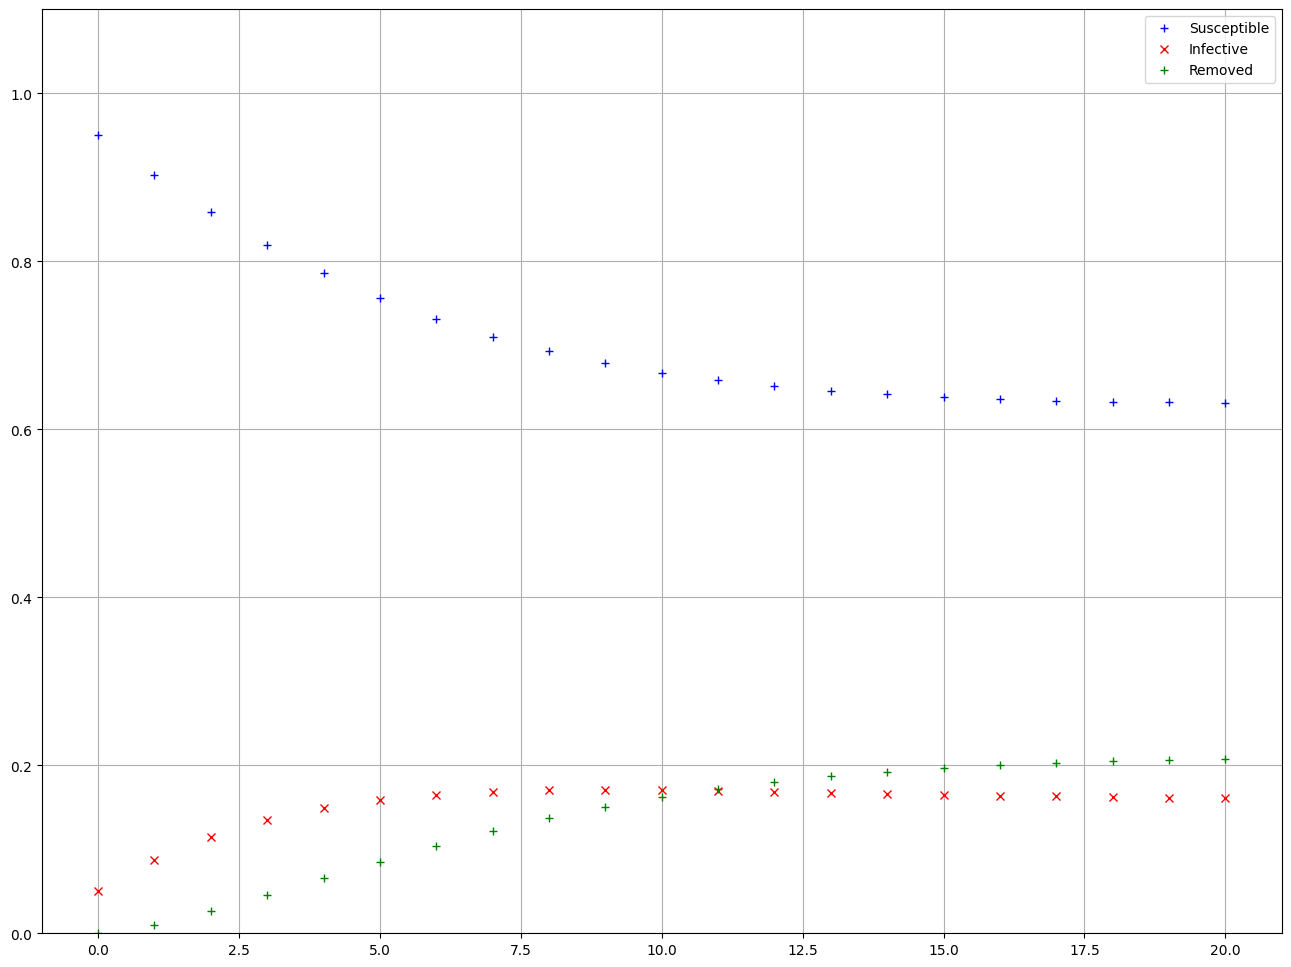

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

A = np.array([[0.95, 0, 0.15],[0.05,0.8,0],[0,0.2,0.85]])

## T is final time
T = 20
## X at time 0
X = np.array([[0.95],[0.05],[0]])

## The first column of results contains the initial values 
results = np.copy(X)

for i in range(T):
    X = A@X
    results = np.hstack((results,X))

## t contains the time indices 0, 1, 2, ..., T
t = np.linspace(0,T,T+1)
## s, i, r values are the rows of the results array
s = results[0,:]
i = results[1,:]
r = results[2,:]

fig,ax = plt.subplots(figsize=(16, 12))

## The optional label keyword argument provides text that is used to create a legend
ax.plot(t,s,'b+',label="Susceptible");
ax.plot(t,i,'rx',label="Infective");
ax.plot(t,r,'g+',label="Removed");

ax.set_ylim(0,1.1)
ax.grid(True)
ax.legend();

Based on the calculation it appears that the state of the population has reached an *equilibrium* after 20 weeks.  In the equilibrium state, each category of the population, $S$, $I$, and $R$, have as many individuals entering the category as leaving it.  In terms of the matrix equation, if $X$ is the vector that contains the equilibrium values of $s_t$, $i_t$, and $r_t$, then $X$ must be a solution to the equation $AX=X$, since $X_{t-1}=X_t$ when the components not changing.  The equation $AX=X$ implies that $X$ is an eigenvector of $A$ corresponding to an eigenvalue of one. If you remember the geometrical interpretation of a matrix as a linear transformation in [3Blue1Brown eigenvectors and eigenvalues video](https://www.youtube.com/watch?v=PFDu9oVAE-g), the eigenvectors are the vectors who experience scaling by a factor of its eigenvalue but do not experience any change of direction. In other words, if we have a vector $X$ that verifies $AX=X$, that vector $X$ is an eigenvector of $A$ with a corresponding eigenvalue $1$. That means that applying the matrix $A$ —which we can see as a geometrical transformation— does not affect the vector at all. This is why if we find an vector $X$ that verifies $AX=X$, we know the values of $X$ are an equilibrium point of the system!

The equation $AX=X$ represents a linear system, even though it is not written in the typical form.  We can rearrange it to look more familiar by using the tools of matrix algebra.  The key is to recognize that $X$ can be written as $IX$, where $I$ is the identity matrix.  This gives $AX=IX$, which can be rewritten as $(A-I)X = 0$.  This matrix equation is the type with which we have been working throughout the previous chapters.

Before attempting to solve the system $(A-I)X = 0$, we first recognize it as a Homogeneous Systems and apply some reasoning based on our knowledge of linear systems.  We know that the solution set of a homogeneous system certainly contains the trivial solution $X=0$.  Therefore if there is also a nonzero solution to $(A-I)X=0$, the system must have an infinite number of solutions since linear systems always have zero, exactly one, or an infinite number of solutions.  If the system $(A-I)X=0$ does not have a unique solution there must be a free variable.




Notice that in our case the matrix is singular, meaning that its determinant is zero and hence it doesn't have an inverse:

In [5]:
from scipy import linalg
AminusI = A - np.identity(3)
print(f"Determinant of A: {linalg.det(AminusI)}")

Determinant of A: -1.1241008124329708e-18


Notice that -1e-18 is the scientific notation for the number 0.0000000000000000018

This is why the values for the inverse matrix are effectively infinity:

In [6]:
print('Inverse matrix of A:\n')
print(linalg.inv(AminusI))

Inverse matrix of A:

[[-2.25179981e+16 -2.25179981e+16 -2.25179981e+16]
 [-5.62949953e+15 -5.62949953e+15 -5.62949953e+15]
 [-7.50599938e+15 -7.50599938e+15 -7.50599938e+15]]


Again, notices that the number 1e15 is 10000000000000000

This means that the system doesn't have an unique solution, therefore it can either have none or infinite. Since we know there is at least the trivial solution $x={0,0,0}$, there must be an infinite amount of solution. If we want to find the equilibrium point of the system we will have to add additional constraints. We know for instance that the sum of the susceptible + infected + recovered must be equal to 1. 

### **Exercises**

- Use [Scipy linalg.eig() function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html) to compute the eigenvalues and eigenvectors of the matrix $A$:

In [7]:
from scipy.linalg import eig

A = np.array([[0.95, 0, 0.15],[0.05,0.8,0],[0,0.2,0.85]])

eigenvalues, eigenvectors = ## Your code here

SyntaxError: invalid syntax (743812329.py, line 5)

- By default, eigenvectors are complex numbers, we can simply extract the real part by appending `.real` to an array. 

In [ ]:
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real
print(eigenvalues)
print('\n')
print(eigenvectors)

- Look for the eigenvector associated to the eigenvalue with the biggest real part and put in a variable as a numpy array:

In [ ]:
eigenvector = ## Your code here
print(eigenvector)

Finally, we will need to impose the constraint on the found values that the sum of the the susceptible + infected + recovered individuals must be 1. We can do so by simply dividing the length of the vector: 

In [ ]:
normalised_eigenvector = eigenvector / np.linalg.norm(eigenvector, ord=1)
print(abs(normalised_eigenvector))

- Finally! We now have a vector that verifies $AX=X$, that is, a state of the system which is not changing anymore. Compare the values you just obtained with those you found by simulating the system for a finite number of steps. How do they relate? 

In [ ]:
## Nothing to code, discuss with your group :)

#### Simulation approach to finding equilibrium points

- Look at the equilibrium values that you obtained on your simulated SIRS model, write them as a state vector $X$ using a numpy array and verify that this state vector is indeed a eigenvector of the system by verifying that $A@X = X$

In [ ]:
## Your code here

- Experiment with a range of initial conditions in the infectious disease model to provide evidence that an equilibrium state is reached for all meaningful initial states. 

In [ ]:
## Code solution here.

- Perform an analysis similar to the that in the example for the following infectious disease model.  In this model the rate at which individuals move from the Recovered category to the Susceptible category is less than that in the example.  Make a plot similar to that in the example and compute the theoretical equilibrium values for $s$, $i$, and $r$. Compare the results obtained with both approaches.

$$
\begin{equation}
X_t = \left[ \begin{array}{r} s_t \\ i_t \\ r_t  \end{array}\right] =
\left[ \begin{array}{rrr} 0.95 & 0 & 0.05 \\ 0.05 & 0.80 & 0 \\ 0 & 0.20 & 0.95 \end{array}\right]
\left[ \begin{array}{r} s_{t-1} \\ i_{t-1} \\ r_{t-1}  \end{array}\right]=
AX_{t-1}
\end{equation}
$$

In [ ]:
## Code solution here